Вам предоставлен файл test_data.csv. Прочитав этот файл, вы получите вот такой DataFrame:

Исходный DataFrame

![alt text](899_1.png)

Ваша задача — очистить данную таблицу от пропусков следующим образом:

Если признак имеет больше 50% пропущенных значений, удалите его.

Для оставшихся данных: если в строке более двух пропусков, удалите строку.

Для оставшихся данных: числовые признаки заполните средним значением, а категориальные — модой.

У вас должна получиться следующая таблица df:

Получившийся DataFrame

![alt text](899_2.png)

Примечание. Не забудьте импортировать библиотеки.

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [259]:
sber_data = pd.read_csv('data/sber_data.csv')
sber_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


#### Задание 6.1
Давайте немного модифицируем функцию outliers_iqr(data, feature). Добавьте в неё параметры left и right, которые задают число IQR влево и вправо от границ ящика (пусть по умолчанию они равны 1.5). Функция, как и раньше, должна возвращать потенциальные выбросы и очищенный DataFrame.

Назовите измененную функцию: outliers_iqr_mod`

In [260]:
import pandas as pd
import numpy as np

def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

#### Задание 6.2
Давайте ослабим границы метода Тьюки справа и усилим их влево. Примените модифицированную функцию outliers_iqr_mod() к признаку full_sq из таблицы sber_data данным с параметрами left=1 и right=6. Результаты работы поместите в переменные outliers и cleaned. Чему равно результирующее число выбросов в данных?

In [261]:
outliers, cleaned = outliers_iqr_mod(sber_data, 'full_sq', left=1, right=6)
display(outliers.shape[0], cleaned.shape[0])

59

30412

#### Задание 6.3
Давайте расширим правило трёх сигм, чтобы иметь возможность учитывать особенности данных. Добавьте в функцию outliers_z_score(data, feature, log_scale=False) параметры left и right, которые будут задавать число сигм (стандартных отклонений) влево и вправо соответственно, определяющее границы метода z-отклонения. По умолчанию оба параметры равны 3.

Результирующую функцию назовите outliers_z_score_mod().

In [262]:
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

#### Задание 6.4
Проверьте, что будет, если дать «послабление» вправо, увеличив число сигм. Наша задача — узнать, начиная с какой границы поселения «Роговское» и «Киевское» перестают считаться выбросами. Примените свою функцию outliers_z_score_mod() к признаку mkad_km с параметрами left=3, right=3.5, log_scale=True. Чему равно результирующее число выбросов?

In [263]:
outliers, cleaned = outliers_z_score_mod(sber_data, 'mkad_km', log_scale=True, left=3, right=3.5)
display(outliers.shape[0], cleaned.shape[0])

0

30471

#### Задание 6.7
Добавьте фишку с логарифмированием в свою функцию outliers_iqr_mod(). Добавьте в неё параметр log_scale. Если он выставлен в True, то производится логарифмирование признака. Примените полученную функцию к признаку price_doc.

In [264]:
def outliers_iqr_mod(data, feature, log_scale=False, left=1.5, right=1.5):
    # Условие log_scale
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    # Определение поьенциальных выбросов    
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

## 8. Закрепление знаний
Этот набор данных создан для того, чтобы на основе определённых диагностических измерений предсказать, есть ли у пациента диабет. 

На выбор этих экземпляров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года индейского происхождения Пима.

In [265]:
diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


Pregnancies — количество беременностей.

Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.

BloodPressure — диастолическое артериальное давление (мм рт. ст.).

SkinThickness — толщина кожной складки трицепса (мм).

Insulin — двухчасовой сывороточный инсулин (ме Ед/мл).

BMI — индекс массы тела (вес в кг / (рост в м)**2).

DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).

Age — возраст.

Outcome — наличие диабета (0 — нет, 1 — да).

Предварительно вы можете провести небольшой разведывательный анализ: посмотреть на распределения признаков и оценить их взаимосвязь с признаком наличия диабета.

In [266]:
#diabetes.info()

In [267]:
#diabetes.describe()

### Задание 8.1
Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

In [268]:
# поиск дубликатов
dupl_columns = list(diabetes.columns)

mask = diabetes.duplicated(subset=dupl_columns)
diabetes_duplicates = diabetes[mask]
print(f'Число найденных дубликатов: {diabetes.shape[0]}')

# удаление дубликатов
diabetes = diabetes.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {diabetes.shape[0]}')

Число найденных дубликатов: 778
Результирующее число записей: 768


### Задание 8.2
Далее найдите все неинформативные признаки в данных и избавьтесь от них. В качестве порога информативности возьмите 0.95: удалите все признаки, для которых 95 % значений повторяются или 95 % записей уникальны.

In [269]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in diabetes.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes[col].nunique() / diabetes[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')
        
        
diabetes = diabetes.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {diabetes.shape[1]}')

Gender: 100.0% одинаковых значений
Результирующее число признаков: 9


### Задание 8.3
Попробуйте найти пропуски в данных с помощью метода isnull().

Спойлер: ничего не найдёте. А они есть! Просто они скрыты от наших глаз. В таблице пропуски в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI обозначены нулём, поэтому традиционные методы поиска пропусков ничего вам не покажут. Давайте это исправим!

Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска. Его вы можете взять из библиотеки numpy: np.nan.

In [270]:
#display(diabetes.isnull().tail())

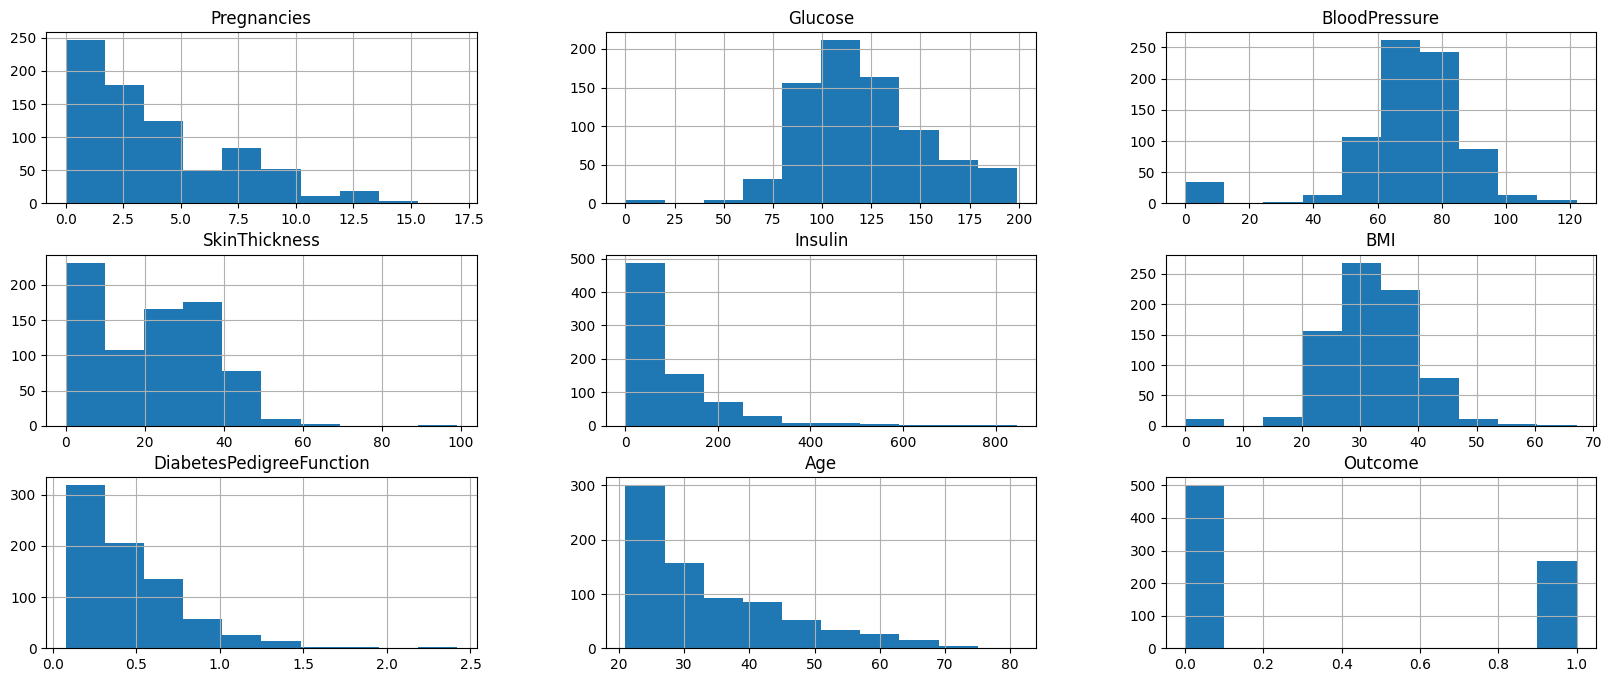

In [271]:
#cols = diabetes.index()
diabetes.hist(figsize=(20, 8));

In [272]:
cols_null_percent = diabetes.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

Series([], dtype: float64)

In [273]:
cols_null = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_null:
    diabetes[col] = diabetes[col].replace({'0': np.nan, 0: np.nan})

display(diabetes.head())   
display(round((diabetes.isnull().mean()), 2))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,190.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,NaN,35.7,0.148,21,0
2,2,108.0,64.0,NaN,NaN,30.8,0.158,21,0
3,8,107.0,80.0,NaN,NaN,24.6,0.856,34,0
4,7,136.0,90.0,NaN,NaN,29.9,0.210,50,0


Pregnancies                 0.00
Glucose                     0.01
BloodPressure               0.05
SkinThickness               0.30
Insulin                     0.49
BMI                         0.01
DiabetesPedigreeFunction    0.00
Age                         0.00
Outcome                     0.00
dtype: float64

### Задание 8.4
Удалите из данных признаки, где число пропусков составляет более 30 %. Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?

In [275]:
diabetes.shape
#diabetes.tail()

(768, 9)

In [276]:
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = diabetes.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
diabetes = diabetes.dropna(thresh=thresh, axis=1) #удаляем записи, в которых есть хотя бы 1 пропуск
#diabetes = diabetes.dropna(how='any', axis=0)

display(diabetes.shape[1])

8

### Задание 8.5
Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. Чему равно результирующее число записей в таблице?

In [277]:
diabetes = diabetes.dropna(thresh=6, axis=0)

display(diabetes.shape[0])

761

### Задание 8.6
В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.

In [242]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 761 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               761 non-null    int64  
 1   Glucose                   756 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   BMI                       757 non-null    float64
 5   DiabetesPedigreeFunction  761 non-null    float64
 6   Age                       761 non-null    int64  
 7   Outcome                   761 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 53.5 KB


In [278]:
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'Pregnancies': diabetes['Pregnancies'].median(),
    'Glucose': diabetes['Glucose'].median(),
    'BloodPressure': diabetes['BloodPressure'].median(),
    'SkinThickness': diabetes['SkinThickness'].median(),
    'BMI': diabetes['BMI'].median(),
    'DiabetesPedigreeFunction': diabetes['DiabetesPedigreeFunction'].median(),
    'Age': diabetes['Age'].median(),
    'Outcome': diabetes['Outcome'].median()
}
#заполняем пропуски в соответствии с заявленным словарем
diabetes = diabetes.fillna(values)

display(diabetes['SkinThickness'].mean())

np.float64(29.109067017082786)

### Задание 8.7
Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?

In [282]:
outliers, cleaned = outliers_iqr_mod(diabetes, 'SkinThickness')
display(outliers.shape[0])


87

### Задание 8.8
Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?

In [283]:
outliers, cleaned = outliers_z_score_mod(diabetes, 'SkinThickness')
display(outliers.shape[0])

4

### Задание 8.9
На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction. Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании признака. Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.

![alt text](dst-3-unit-1-mod-14-35.png)

Затем найдите число выбросов в этом же признаке в логарифмическом масштабе (при логарифмировании единицу прибавлять не нужно!). Какова разница между двумя этими числами (вычтите из первого второе)?

In [290]:
def outliers_iqr_mod(data, feature, log_scale=False, left=1.5, right=1.5):
    # Условие log_scale
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    # Определение поьенциальных выбросов    
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned


# классический метод межквартильного размаха
outliers, cleaned = outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction')
display(outliers.shape[0])

# классический метод в логарифмическом масштабе
outliers_log, cleaned_log = outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction', log_scale=True)
display(outliers_log.shape[0])

29

0